In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let us generate some nonlinear data, based on a simple quadratic equation $\frac{1}{2}x^2+x+2$ (plus some Gaussian noise)

Text(0, 0.5, 'response y')

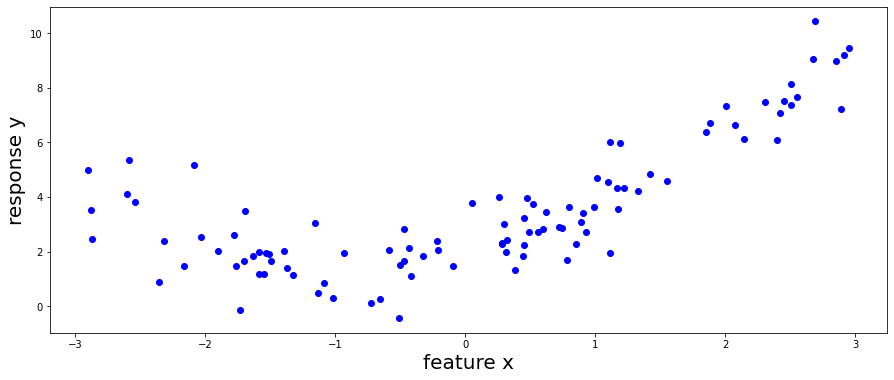

In [3]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)
plt.figure(figsize=(15,6))
plt.plot(X,y,'bo')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)

Let us split the dataset, so that 3/4 of it is used to train the model, after which we measure the model's performance on the remaining 1/4.

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

## Linear Regression

Clearly, a straight line $y = \theta_0 + \theta_1x$ will never fit this data properly:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Text(0.5, 0.98, 'RMSE on testing set: 1.93')

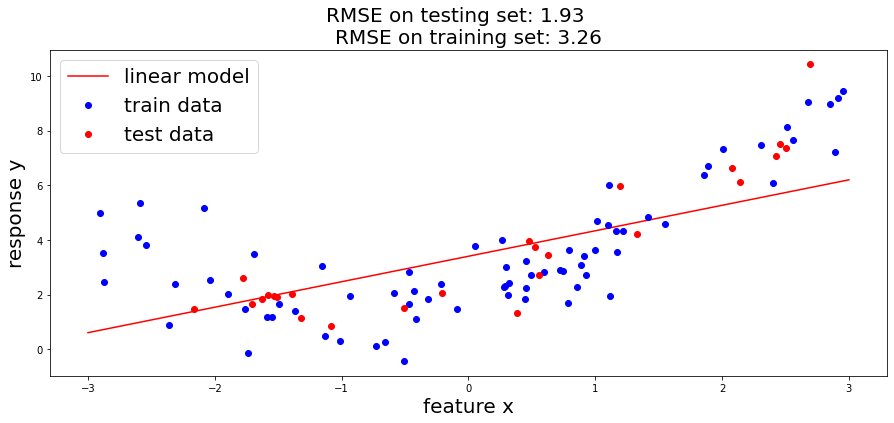

In [6]:
# fit a linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#RMSE on train set
y_train_pred = lin_reg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = lin_reg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = lin_reg.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)

# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

The linear model is underfitting the data

## Polynomial regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=2,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

Text(0.5, 0.98, 'RMSE on testing set: 0.65')

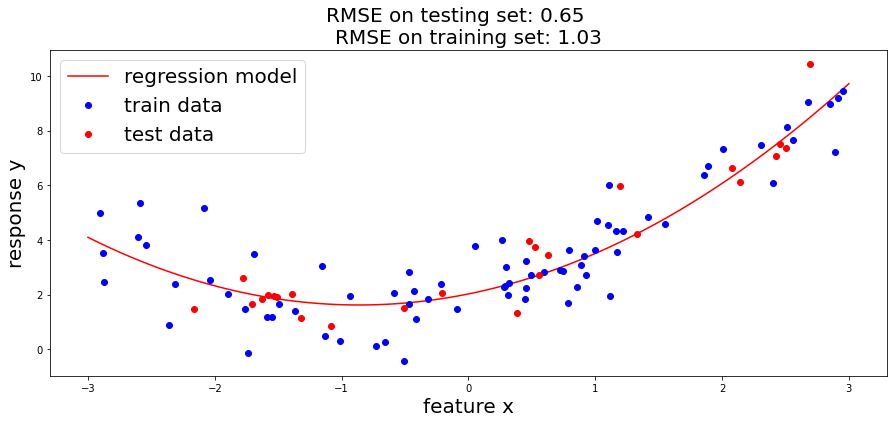

In [8]:
# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='regression model')

# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)

# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

## Overfitting

If we perform high-degree polynomial regression, we will likely fit the training data much better than with plain Linear Regression.
But the model will severely overfit the training data.

(-1.0, 10.0)

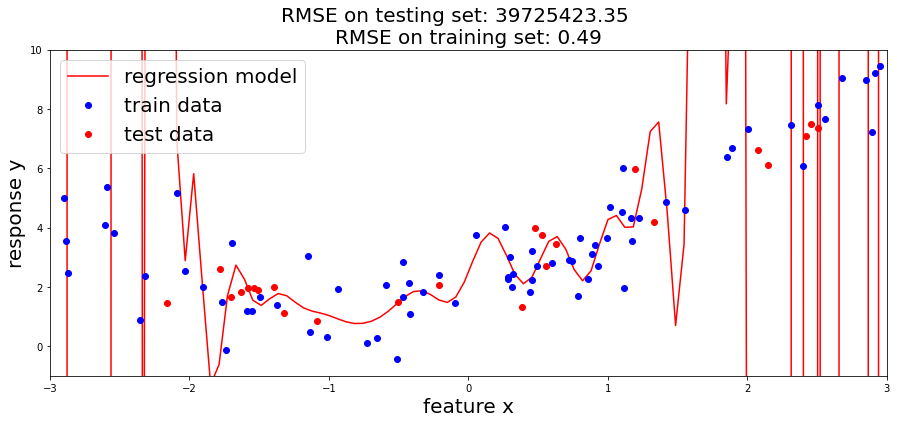

In [9]:
# high-degree polynomial regression
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=75,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', LinearRegression()) # fit_intercept=False
])

# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='regression model')

# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)

# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

plt.xlim([-3,3])
plt.ylim([-1,10])

Notice how the 75-degree polynomial model wiggles around to get as close as possible to the training data points

In [23]:
# The higher your regression model degree, the more likely you are to overfit the data
rmse_train = []
rmse_test = []
max_deg = 30
for degree in range(1,max_deg):
    pipe = Pipeline(steps=[
        ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
        ('scaler',StandardScaler()),
        ('reg', LinearRegression())
    ])
    
    # fit the pipeline
    pipe.fit(X_train,y_train)
    #RMSE on train set
    y_train_pred = pipe.predict(X_train)
    rmse_train.append(mean_squared_error(y_train,y_train_pred))
    #RMSE on test set
    y_test_pred = pipe.predict(X_test)
    rmse_test.append(mean_squared_error(y_test,y_test_pred))

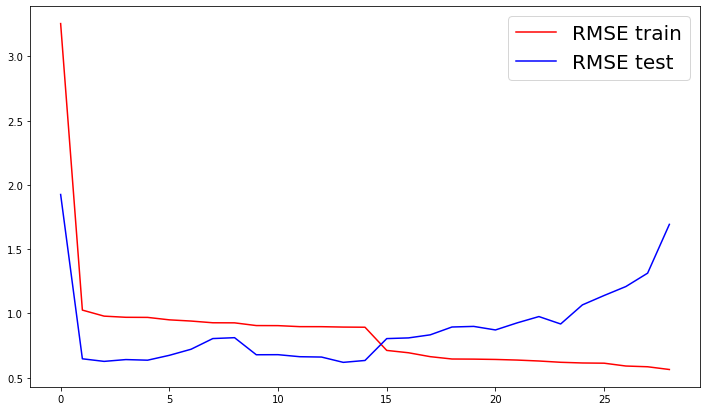

In [19]:
plt.figure(figsize=(12,7))
plt.plot(range(max_deg-1),rmse_train,'r', label='RMSE train')
plt.plot(range(max_deg-1),rmse_test,'b', label='RMSE test')
plt.legend(fontsize=20)

## Regularization

(-1.0, 10.0)

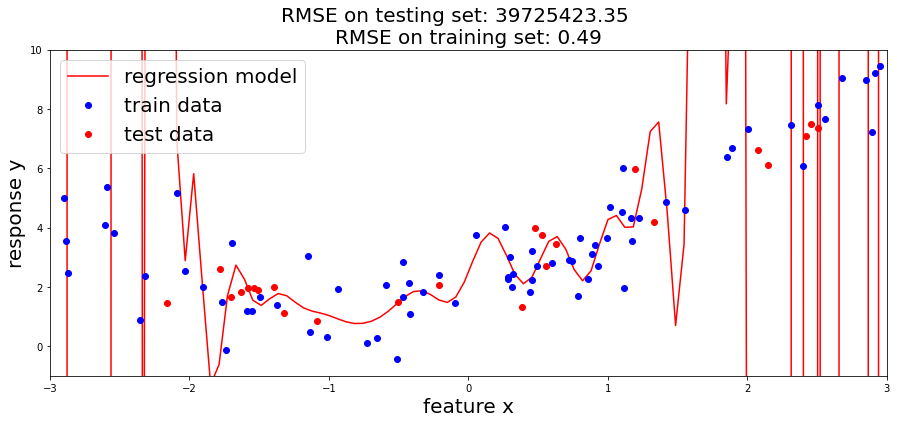

In [20]:
# no regularization
degree=75
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', LinearRegression()) # fit_intercept=False
])
# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='regression model')
# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

plt.xlim([-3,3])
plt.ylim([-1,10])

Having large model coefficients can be seen as evidence of overfitting:

<BarContainer object of 75 artists>

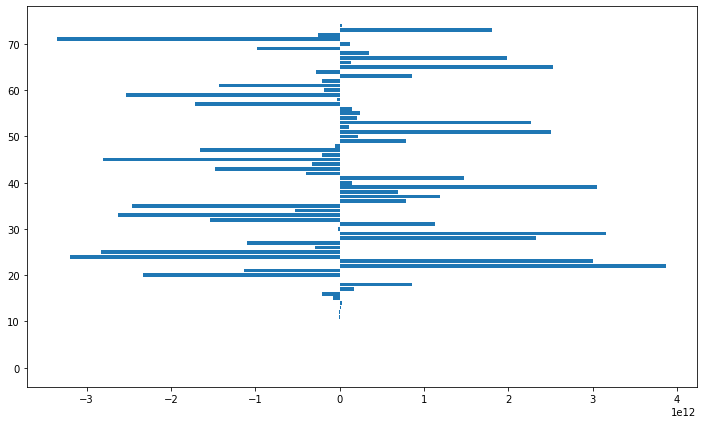

In [22]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

One way to reduce overfittin is to **regularize the model**, this is, to contrain it: the fewer degrees of freedom it has, the harder it  will be for it to over fit the data.
Regularization is typically achieved by **constraining the model coefficients**

### Ridge Regression

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n \theta_i^2 
$$

This forces the model to not only fit the data but also keep the model coefficients as small as possible.
The **hyperparameter $\alpha$** controls how much you want to regularize the model.
- If $\alpha=0$, then Ridge Regression is just Linear Regression.
- If $\alpha$ is very large, then all coefficients end up very close to zero and the result is a flat line goint through the data's mean.

In [24]:
from sklearn.linear_model import Ridge

The code below trains a Ridge Regression model. 
You can play with different values of the regularization hyperparameter $\alpha$.

(-1.0, 10.0)

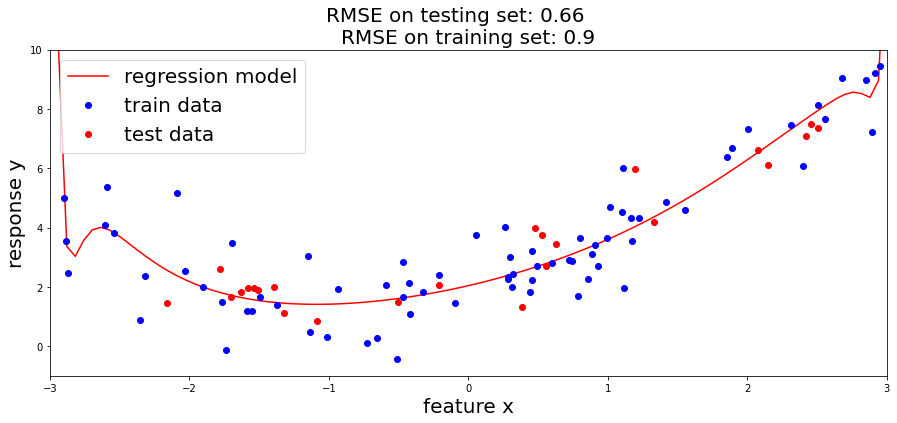

In [33]:
# Ridge regularization
degree=75 
alpha=1

pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', Ridge(alpha=alpha)) # fit_intercept=False
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='regression model')
# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

plt.xlim([-3,3])
plt.ylim([-1,10])

<BarContainer object of 75 artists>

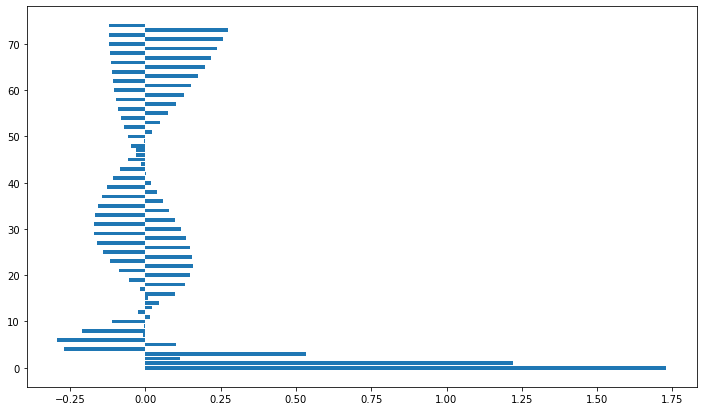

In [34]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

### Lasso (Least Absolute Shrinkage and Selection Operator) Regularization 

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n |\theta_i| 
$$

An important characteristic of Lasso Regression is that it tends to eliminate the coefficients of the least important features (this is, set them to zero).

In [36]:
from sklearn.linear_model import Lasso

(-1.0, 10.0)

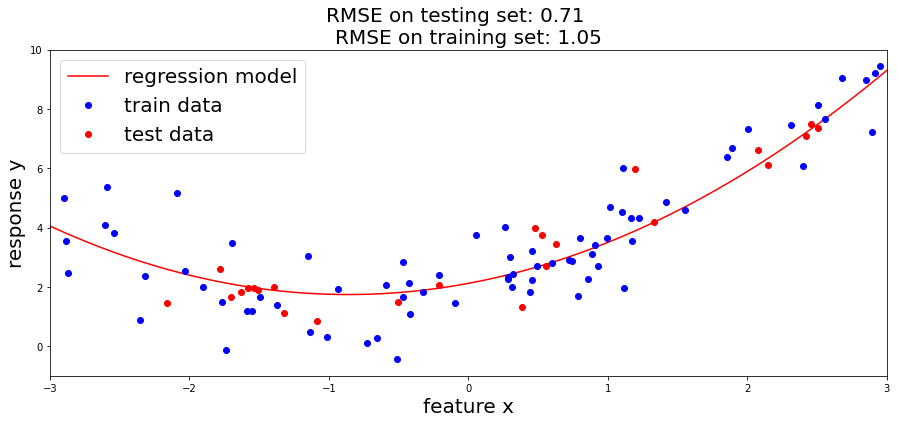

In [37]:
# Lasso regularization
degree=75
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', Lasso(alpha=0.1)) # fit_intercept=False
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
X_plot = np.linspace(-3,3,100)[:,None]
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='regression model')
# plot dataset
plt.plot(X_train,y_train,'bo', label='train data')
plt.plot(X_test,y_test,'ro', label='test data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
# display RMSEs
plt.title('RMSE on training set: '+str(np.round(rmse_train,2)), fontsize=20)
plt.suptitle('RMSE on testing set: '+str(np.round(rmse_test,2)), fontsize=20)

plt.xlim([-3,3])
plt.ylim([-1,10])

<BarContainer object of 75 artists>

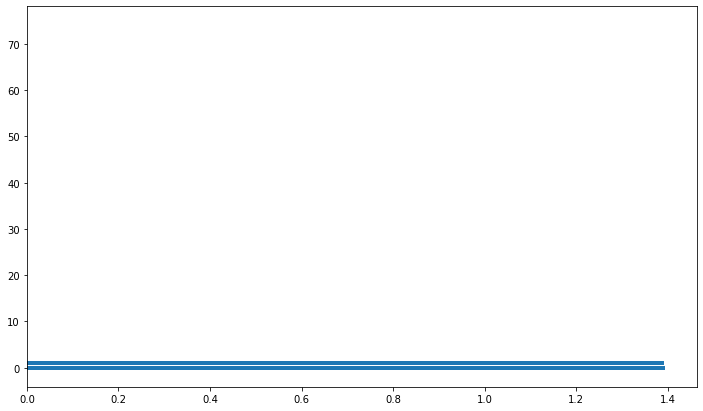

In [38]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

In [39]:
pipe['reg'].coef_

array([ 1.39345558,  1.39261293,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.  

In [40]:
pipe['reg'].intercept_

array([3.4654849])